In [1]:
!pip install -q -U autogluon.tabular

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.29.165 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


In [2]:
from autogluon.tabular import TabularPredictor,TabularDataset
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import shutil

warnings.filterwarnings('ignore')
seed = 27

# Loading the Dataset

In [3]:
train = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/train.csv', index_col='id')


In [4]:
_train, _val = train_test_split(
    train, 
    test_size=0.1, 
    random_state=seed
)

del train

In [5]:
_train = TabularDataset(_train)
_val = TabularDataset(_val)

# Training

In [6]:
predictor = TabularPredictor(
    label='FloodProbability',
    eval_metric='r2',
    problem_type="regression",
    verbosity=2
).fit(
    train_data=_train,
    time_limit=3600 * 10,
    presets="best_quality",
    excluded_model_types = ["NN_TORCH", "FASTAI", "NN"],
    keep_only_best=True,
    hyperparameter_tune_kwargs={  
        'num_trials': 50,
        'scheduler' : 'local',
        'searcher'  : 'bayes'
    },
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240516_201506"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 36000 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240516_201506/ds_sub_fit/sub_fit_ho.
2024-05-16 20:15:07,678	INFO util.py:124 -- Outdated packages:
  ipywidgets==

  0%|          | 0/50 [00:00<?, ?it/s]

Will use sequential fold fitting strategy because import of ray failed. Reason: ray==2.9.0 detected. 2.10.0 <= ray < 2.11.0 is required. You can use pip to install certain version of ray `pip install ray==2.10.0` 
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 7. Best iteration is:
	[7]	valid_set's l2: 0.00151647	valid_set's r2: -81.5441
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00233238	valid_set's r2: -89.1303
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00241762	valid_set's r2: -91.5808
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best itera

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 5. Best iteration is:
	[5]	valid_set's l2: 0.00171007	valid_set's r2: -80.9172
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 3. Best iteration is:
	[3]	valid_set's l2: 0.00181757	valid_set's r2: -82.6714
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00239913	valid_set's r2: -90.4574
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.0025924	valid_set's r2: -93.8796
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iterati

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 13.
	Ran out of time, early stopping on iteration 15.
	Ran out of time, early stopping on iteration 17.
	Ran out of time, early stopping on iteration 16.
	Ran out of time, early stopping on iteration 17.
	Ran out of time, early stopping on iteration 18.
	Ran out of time, early stopping on iteration 21.
	Ran out of time, early stopping on iteration 26.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.703	 = Validation score   (r2)
	75.28s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 84.28s of the 8694.43s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L1... Skipping this model.
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 84.28s of the 8593.65s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 7. Best iteration is:
	[7]	valid_set's l2: 0.00183013	valid_set's r2: -82.7085
	Time limit exceeded... Skipping LightGBMLarge_BAG_L1.
Hyperparameter tuning model: CatBoost_r177_BAG_L1 ... Tun

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00239251	valid_set's r2: -91.3578
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00230949	valid_set's r2: -89.8278
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00239343	valid_set's r2: -91.3578
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00258204	valid_set's r2: -94.0909
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iterat

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.0023886	valid_set's r2: -90.6446
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00230335	valid_set's r2: -89.4291
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.0023889	valid_set's r2: -90.6446
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00258146	valid_set's r2: -94.0909
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteratio

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 12.
	Ran out of time, early stopping on iteration 13.
	Ran out of time, early stopping on iteration 16.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.2891	 = Validation score   (r2)
	62.39s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 71.43s of the 4591.03s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/auto

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 71.43s of the 4505.32s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00247536	valid_set's r2: -94.012
	Time limit exceeded... Skipping LightGBMLarge_BAG_L2.
Hyperparameter tuning model: CatBoost_r177_BAG_L2 ... Tuning model for up to 71.43s of the 4491.48s of remaining time.
	No hyperparameter search space specified for CatBoost_r177_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with Sequenti

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 54. Best iteration is:
	[52]	valid_set's l2: 0.000376001	valid_set's r2: -81.2983
	Ran out of time, early stopping on iteration 57. Best iteration is:
	[57]	valid_set's l2: 0.000372953	valid_set's r2: -81.0401
	Ran out of time, early stopping on iteration 58. Best iteration is:
	[58]	valid_set's l2: 0.000372211	valid_set's r2: -81.8225
	Ran out of time, early stopping on iteration 60. Best iteration is:
	[60]	valid_set's l2: 0.000365884	valid_set's r2: -81.6417
	Ran out of time, early stopping on iteration 64. Best iteration is:
	[64]	valid_set's l2: 0.000365807	valid_set's r2: -80.9703
	Ran out of time, early stopping on iteration 67. Best iteration is:
	[62]	valid_set's l2: 0.000363417	valid_set's r2: -81.4569
	Ran out of time, early stopping on iteration 74. Best iteration is:
	[72]	valid_set's l2: 0.000362525	valid_set's r2: -81.012
	Ran out of time,

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	0.5859	 = Validation score   (r2)
	192.59s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L1 ... Tuning model for up to 267.68s of the 28089.5s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 1334, in _hyperparameter_tune
    hpo_executor.validate_search_space(search_space, self.name)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/hpo/executors.py", line 512, in validate_search_space
    raise EmptySearchSpace
autogluon.core.hpo.exceptions.EmptySearchSpace

During handling of the above exception, anot

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 61.
	Ran out of time, early stopping on iteration 55.
	Ran out of time, early stopping on iteration 66.
	Ran out of time, early stopping on iteration 69.
	Ran out of time, early stopping on iteration 71.
	Ran out of time, early stopping on iteration 76.
	Ran out of time, early stopping on iteration 85.
	Ran out of time, early stopping on iteration 105.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.8636	 = Validation score   (r2)
	251.28s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 267.68s of the 27782.63s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	0.8671	 = Validation score   (r2)
	284

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	0.7999	 = Validation score   (r2)
	254.55s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 267.68s of the 27237.97s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 35. Best iteration is:
	[20]	valid_set's l2: 0.00100763	valid_set's r2: -81.274
	Ran out of time, early stopping on iteration 36. Best iteration is:
	[20]	valid_set's l2: 0.00101238	valid_set's r2: -81.0178
	Ran out of time, early stopping on iteration 38. Best iteration is:
	[21]	valid_set's l2: 0.000968571	valid_set's r2: -81.7855
	Ran out of time, early stopping on iteration 38. Best iteration is:
	[20]	valid_set's l2: 0.00100549	valid_set's r2: -81.6237
	Ran out of time, early stopping on it

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 14. Best iteration is:
	[14]	valid_set's l2: 0.000901422	valid_set's r2: -81.111
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 9. Best iteration is:
	[9]	valid_set's l2: 0.000973725	valid_set's r2: -81.1092
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 6. Best iteration is:
	[6]	valid_set's l2: 0.00158757	valid_set's r2: -81.3156
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 3. Best iteration is:
	[1]	valid_set's l2: 0.00258251	valid_set's r2: -93.9617
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best ite

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 12. Best iteration is:
	[11]	valid_set's l2: 0.00107683	valid_set's r2: -81.0576
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 8. Best iteration is:
	[8]	valid_set's l2: 0.00105255	valid_set's r2: -81.159
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 5. Best iteration is:
	[5]	valid_set's l2: 0.00170148	valid_set's r2: -81.8896
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 2. Best iteration is:
	[1]	valid_set's l2: 0.00258191	valid_set's r2: -93.9617
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best itera

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 21.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 19.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 11.
	Ran out of time, early stopping on iteration 10.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 14.
	Ran out of time, early stopping on iteration 15.
	Ran out of time, early stopping on iteration 16.
	Ran out of time, early stopping on iteration 20.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T3 ...
	0.3244	 = Validation score   (r2)
	134.18s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model f

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 215.05s of the 13693.46s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 11. Best iteration is:
	[11]	valid_set's l2: 0.00150201	valid_set's r2: -81.3213
	Time limit exceeded

In [7]:
X_train = _train.drop('FloodProbability', axis=1)
y_train = _train['FloodProbability']

y_preds = predictor.predict(X_train)

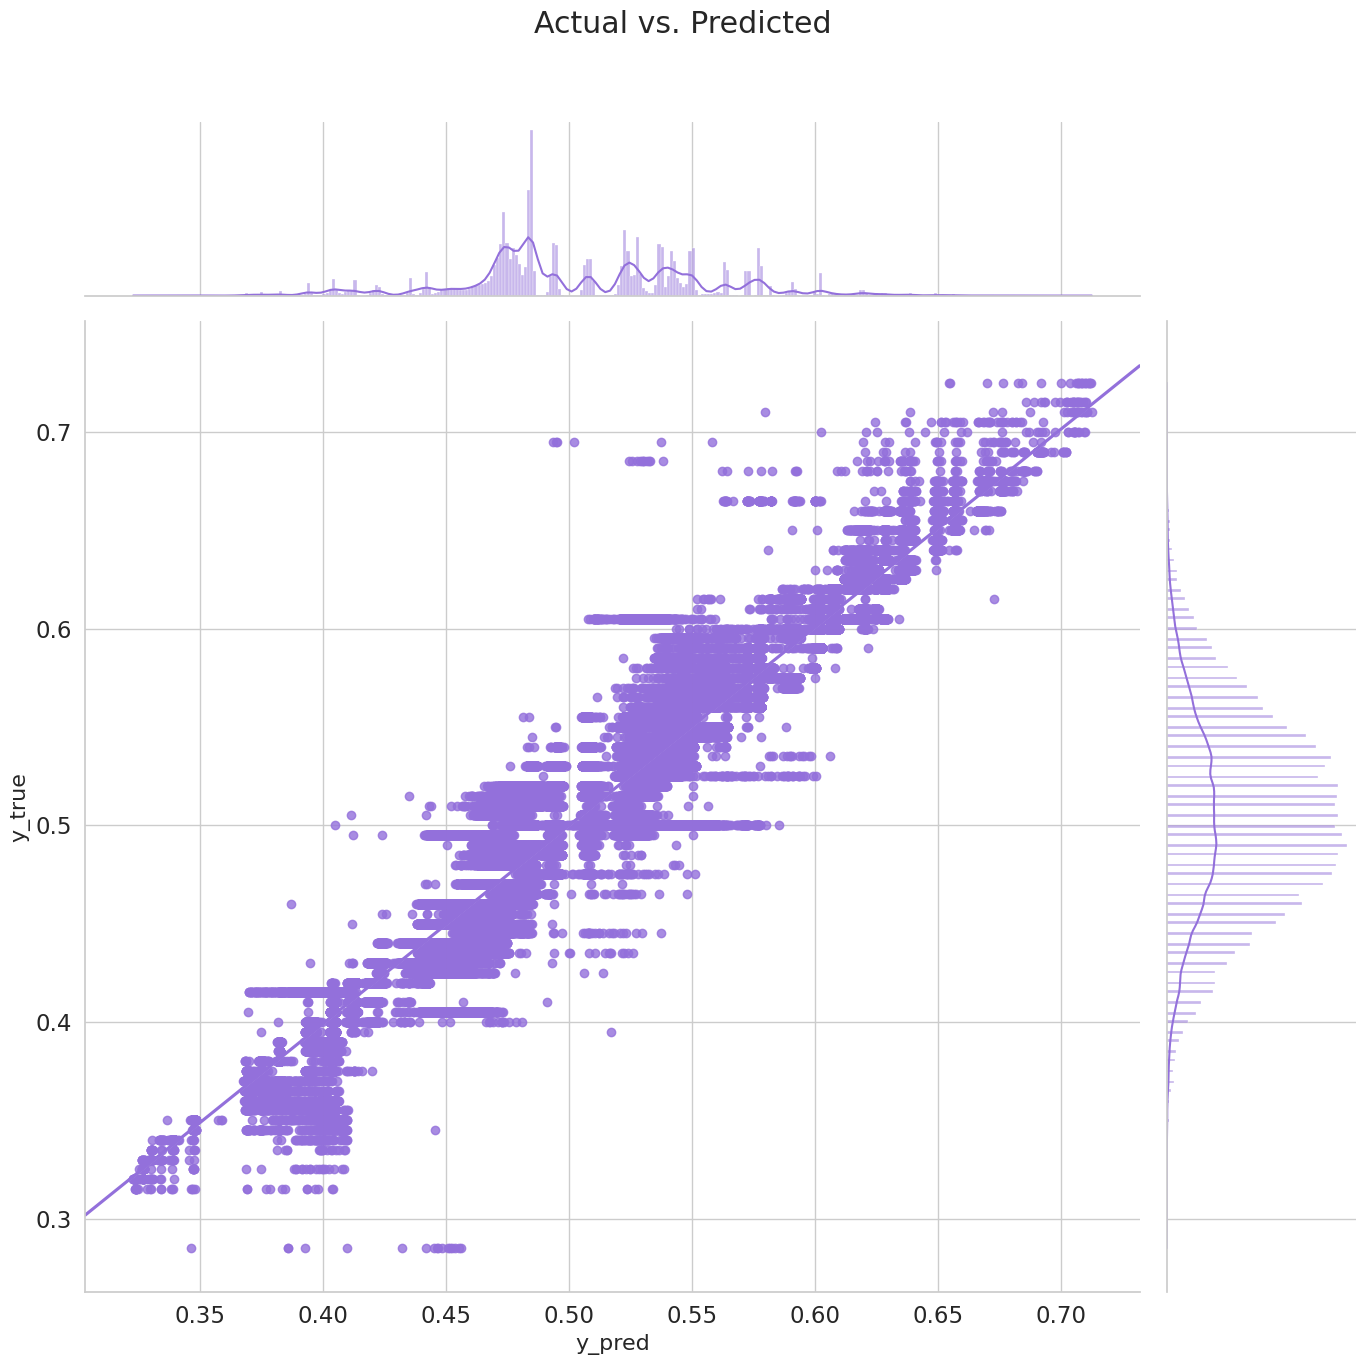

In [8]:
sns.set(style="whitegrid", font_scale=1.5)
g = sns.jointplot(
    x=y_preds,
    y=y_train,
    kind="reg",
    truncate=False,
    color='#9370DB',
    height=14,
)
g.set_axis_labels('y_pred', 'y_true', fontsize=16)
g.fig.suptitle("Actual vs. Predicted")
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)

# Visualizing the Results

In [9]:
score = predictor.evaluate(_val, silent=True)['r2']

In [10]:
print(f"Validation R2 Score: {score}")

Validation R2 Score: 0.8693554926421738


In [11]:
fi = predictor.feature_importance(data=_val, silent=True)
lb = predictor.leaderboard(_val, silent=True)

These features in provided data are not utilized by the predictor and will be ignored: ['_sort_0', '_sort_19', '_50th', '_cnt18', '_cnt19', '_cnt22']


In [12]:
lb.style.background_gradient(subset=['score_val', 'score_test'], cmap='RdYlGn')

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.869355,0.869254,r2,93.833412,2.384687,12579.315231,0.008263,0.019605,7.275639,3,True,52
1,XGBoost_r194_BAG_L1,0.869240,0.869124,r2,1.129628,0.004236,254.640694,1.129628,0.004236,254.640694,1,True,19
2,CatBoost_r6_BAG_L2,0.869080,0.868832,r2,93.825148,2.365082,12572.039592,0.789510,0.004302,206.045845,2,True,51
3,ExtraTrees_r172_BAG_L1,0.868530,0.867500,r2,0.583884,0.003137,277.545110,0.583884,0.003137,277.545110,1,True,20
4,ExtraTrees_r42_BAG_L1,0.868523,0.867244,r2,0.861996,0.003224,280.807051,0.861996,0.003224,280.807051,1,True,12
5,ExtraTreesMSE_BAG_L1,0.868371,0.867096,r2,0.596214,0.003175,284.079977,0.596214,0.003175,284.079977,1,True,4
6,CatBoost_r180_BAG_L1,0.868080,0.868023,r2,0.967351,0.004238,253.068636,0.967351,0.004238,253.068636,1,True,44
7,CatBoost_r6_BAG_L1,0.868066,0.868108,r2,1.094737,0.004171,253.740232,1.094737,0.004171,253.740232,1,True,42
8,ExtraTrees_r178_BAG_L1,0.868037,0.866324,r2,1.054833,0.003338,279.570079,1.054833,0.003338,279.570079,1,True,37
9,CatBoost_r163_BAG_L1,0.867903,0.867958,r2,0.314184,0.004225,253.318600,0.314184,0.004225,253.318600,1,True,46


In [13]:
fi.style.background_gradient(cmap='RdYlGn')

,importance,stddev,p_value,n,p99_high,p99_low
_sum,0.986872,0.011354,0.000000,5,1.010250,0.963494
_mean,0.015262,0.000530,0.000000,5,0.016353,0.014171
_sum_log,0.011691,0.000364,0.000000,5,0.012440,0.010941
_entropy,0.001846,0.000371,0.000186,5,0.002611,0.001081
_special1,0.001115,0.000172,0.000066,5,0.001469,0.000761
_max,0.000847,0.000251,0.000826,5,0.001364,0.000330
_cnt15,0.000410,0.000165,0.002595,5,0.000750,0.000069
_2nd_moment,0.000407,0.000193,0.004573,5,0.000804,0.000010
_skew,0.000228,0.000142,0.011314,5,0.000520,-0.000063
_gmean,0.000226,0.000187,0.027055,5,0.000612,-0.000160


# Making Predictions and Creating a Submission File

In [14]:
test = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/test.csv', index_col='id')
test = TabularDataset(test)

preds = predictor.predict(test)

In [15]:
submission = pd.DataFrame({'id': test.index, 'FloodProbability ': preds})
submission.to_csv(f'autogluon-{score:.6f}.csv', index=False)
submission.head()

,id,FloodProbability
id,,
1117957,1117957,0.577820
1117958,1117958,0.455745
1117959,1117959,0.446662
1117960,1117960,0.466440
1117961,1117961,0.467230


In [16]:
shutil.rmtree("AutogluonModels")